In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
match=pd.read_csv("matches (2).csv")
delivery=pd.read_csv("deliveries.csv")

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
match.shape

(756, 18)

In [6]:
delivery.shape

(179078, 21)

In [7]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_47316/2630719186.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [8]:
total_score_df.shape

(1528, 3)

In [9]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [10]:
total_score_df.head()

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


In [11]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [12]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [13]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [15]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [16]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [17]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [18]:
match_df.shape

(641, 20)

In [19]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [20]:
match_df=match_df[match_df['dl_applied']==0]

In [21]:
match_df.shape

(626, 20)

In [22]:
match_df=match_df[['match_id','city','winner','total_runs','toss_winner','toss_decision']]

In [23]:
match_df

,match_id,city,winner,total_runs,toss_winner,toss_decision
0,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field
4,5,Bangalore,Royal Challengers Bangalore,157,Royal Challengers Bangalore,bat
6,7,Mumbai,Mumbai Indians,178,Mumbai Indians,field
7,8,Indore,Kings XI Punjab,148,Royal Challengers Bangalore,bat
9,10,Mumbai,Mumbai Indians,158,Mumbai Indians,field
...,...,...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143,Mumbai Indians,field
752,11412,Chennai,Mumbai Indians,136,Chennai Super Kings,bat
753,11413,Visakhapatnam,Delhi Capitals,171,Delhi Capitals,field
754,11414,Visakhapatnam,Chennai Super Kings,155,Chennai Super Kings,field


In [24]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [25]:
delivery_df=match_df.merge(delivery,on='match_id')

In [26]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [27]:
delivery_df

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [28]:
delivery_df.shape

(72413, 26)

In [29]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_47316/3025607697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [30]:
delivery_df

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [31]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [32]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [33]:
delivery_df

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [34]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_47316/3117972629.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,4,0,4,0,NaN,NaN,7,200,115,10


In [35]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [36]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [37]:
delivery_df

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,1,0,NaN,NaN,152,0,4,5,7.862069,0.000000
149574,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,2,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000
149575,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,1,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000
149576,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,2,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000


In [38]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [39]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [40]:
delivery_df

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
149574,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
149575,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
149576,11415,Hyderabad,Mumbai Indians,152,Mumbai Indians,bat,2,Chennai Super Kings,Mumbai Indians,20,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


In [41]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [42]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.0,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.0,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.0,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.5,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.4,10.434783,0


In [43]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
91026,Kolkata Knight Riders,Rajasthan Royals,Abu Dhabi,86,53,8,152,5.910448,9.735849,0
52759,Rajasthan Royals,Mumbai Indians,Jaipur,87,110,10,94,4.200000,4.745455,1
61580,Kolkata Knight Riders,Kings XI Punjab,Kolkata,78,76,8,134,7.636364,6.157895,0
104848,Royal Challengers Bangalore,Mumbai Indians,Bangalore,94,42,6,209,8.846154,13.428571,0
48015,Kolkata Knight Riders,Chennai Super Kings,Chennai,63,49,9,153,7.605634,7.714286,0
...,...,...,...,...,...,...,...,...,...,...
84444,Rajasthan Royals,Mumbai Indians,Mumbai,144,97,8,166,5.739130,8.907216,0
81376,Chennai Super Kings,Mumbai Indians,Mumbai,97,63,4,139,4.421053,9.238095,0
28180,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,44,18,4,157,6.647059,14.666667,0
81097,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,154,107,10,174,9.230769,8.635514,1


In [44]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
111840,Delhi Daredevils,Chennai Super Kings,Raipur,60,67,8,119,6.679245,5.373134,1


In [45]:
final_df.isna().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [46]:
final_df.dropna(inplace=True)

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_47316/2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [47]:
final_df=final_df[final_df['balls_left']!=0]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [50]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
22755,Rajasthan Royals,Kings XI Punjab,Cape Town,131,110,9,139,4.800000,7.145455
149502,Chennai Super Kings,Mumbai Indians,Hyderabad,91,73,9,152,7.787234,7.479452
4619,Mumbai Indians,Royal Challengers Bangalore,Mumbai,92,66,8,162,7.777778,8.363636
90058,Kolkata Knight Riders,Kings XI Punjab,Abu Dhabi,93,65,7,132,4.254545,8.584615
135658,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,101,48,8,189,7.333333,12.625000
...,...,...,...,...,...,...,...,...,...
103573,Rajasthan Royals,Sunrisers Hyderabad,Visakhapatnam,116,108,10,127,5.500000,6.444444
43015,Deccan Chargers,Royal Challengers Bangalore,Bangalore,89,50,7,184,8.142857,10.680000
44720,Delhi Daredevils,Mumbai Indians,Mumbai,86,43,4,183,7.558442,12.000000
105544,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,145,89,8,181,6.967742,9.775281


In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [53]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [55]:
pipe.fit(X_train,y_train)

/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [56]:
y_pred= pipe.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_pred)

0.8067138552105964

In [60]:
from sklearn.ensemble import RandomForestClassifier

pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [61]:
pipe.fit(X_train,y_train)

/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [62]:
y_pred= pipe.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred)

0.9990889340528418

In [64]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [65]:
pipe.fit(X_train,y_train)

/Users/nikhil/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [66]:
accuracy_score(y_test,y_pred)

0.9990889340528418

In [67]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [68]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [69]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,56.2,43.8
10467,2,8,0,50.4,49.6
10473,3,1,0,57.5,42.5
10479,4,7,1,69.2,30.8
10485,5,12,0,58.8,41.2
10491,6,13,0,46.3,53.7
10497,7,9,0,40.4,59.6
10505,8,15,0,26.7,73.3
10511,9,7,0,24.6,75.4
10518,10,17,0,13.4,86.6


Text(0.5, 1.0, 'Target-178')

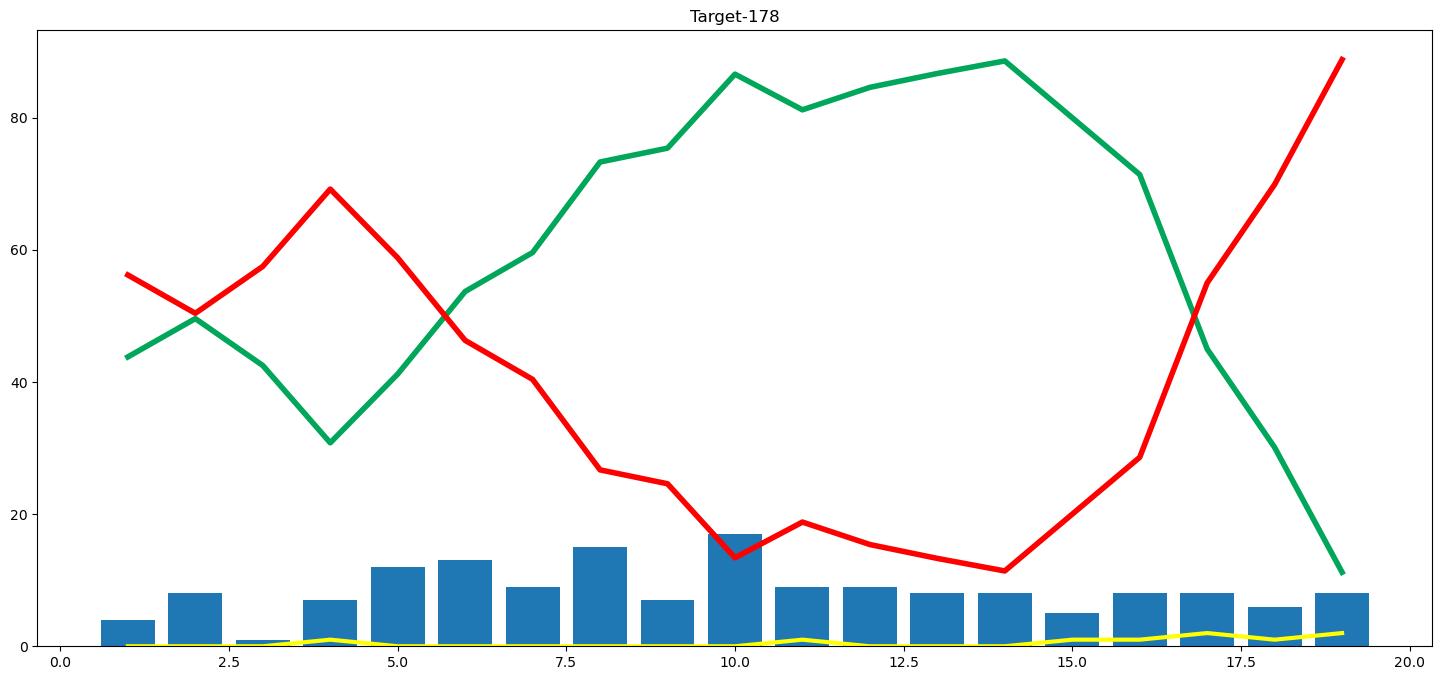

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [74]:
temp_df,target = match_progression(delivery_df,69,pipe)
temp_df

Target- 182


,end_of_over,runs_after_over,wickets_in_over,lose,win
9298,1,2,0,73.1,26.9
9304,2,12,0,61.0,39.0
9311,3,4,2,86.0,14.0
9317,4,3,0,87.6,12.4
9324,5,13,0,80.9,19.1
9330,6,5,0,81.1,18.9
9336,7,6,0,80.3,19.7
9343,8,15,0,68.7,31.3
9350,9,5,1,80.8,19.2
9356,10,2,1,90.8,9.2


Text(0.5, 1.0, 'Target-182')

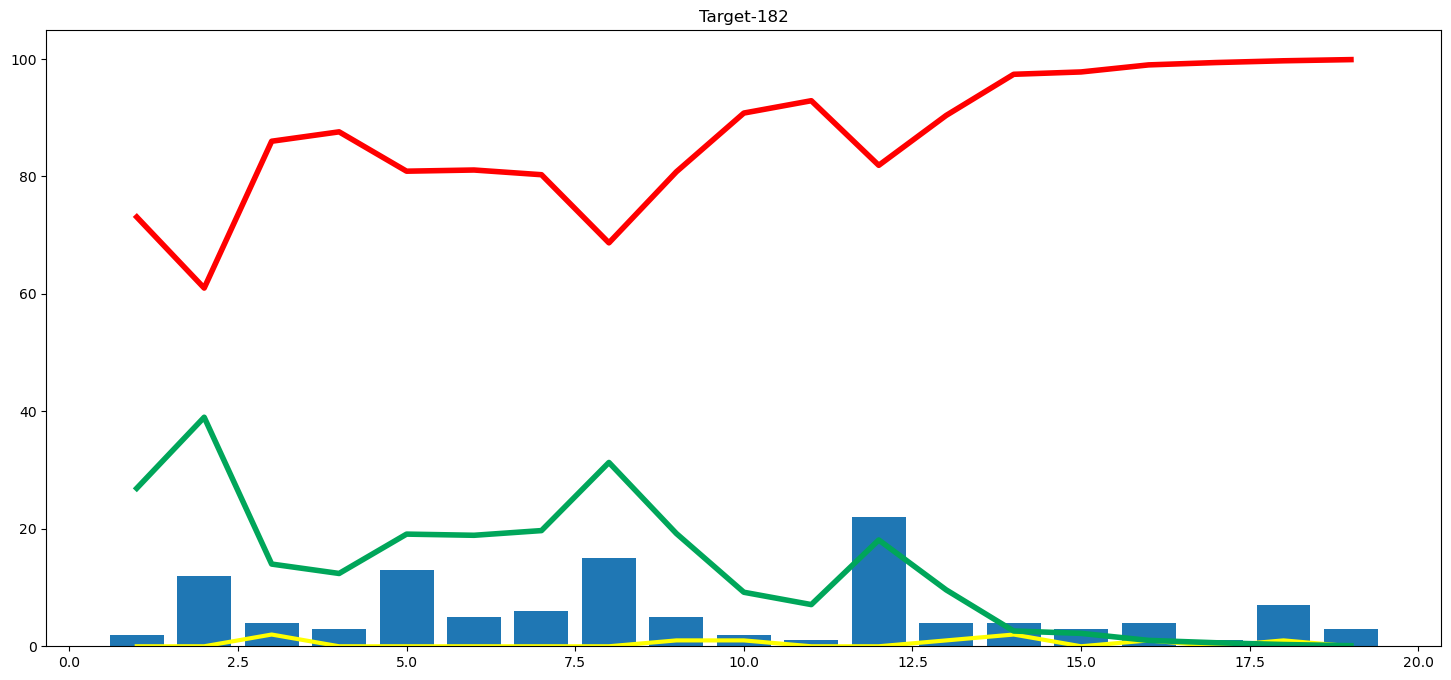

In [75]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))